In [1]:
import tensorflow as tf
import numpy as np 

In [3]:
X = tf.constant(range(10), dtype=tf.float32)
Y = 2 * X + 10
print("X:{}".format(X))
print("Y:{}".format(Y))

X:[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Y:[10. 12. 14. 16. 18. 20. 22. 24. 26. 28.]


In [6]:
X_test = tf.constant(range(10,20) , dtype = tf.float32)
Y_test = 2 * X_test + 10

print("X_test:" , X_test)
print("Y_test:" , Y_test)

X_test: tf.Tensor([10. 11. 12. 13. 14. 15. 16. 17. 18. 19.], shape=(10,), dtype=float32)
Y_test: tf.Tensor([30. 32. 34. 36. 38. 40. 42. 44. 46. 48.], shape=(10,), dtype=float32)


In [7]:
y_mean  = Y.numpy().mean()

def predict_mean(X):
  y_hat = y_mean * len(X)
  return y_hat

y_hat = predict_mean(X_test)


Using mean squared error, our loss is:$$
MSE = \frac{1}{m}\sum_{i=1}^{m}(\hat{Y}_i-Y_i)^2
$$

For this simple model the loss is then:

In [11]:
errors = (y_hat - Y)**2
loss = tf.reduce_mean(errors)
loss.numpy()

29274.0

In [13]:
def loss_mse(X , Y , w0 , w1):
  y_hat = w0 * X + w1
  errors = (y_hat - Y)**2
  return tf.reduce_mean(errors)

## Gradient Decent

In [16]:
def compute_gradient(X , Y , w0 , w1):
  with tf.GradientTape() as tape:
    loss = loss_mse(X,Y,w0,w1)
  return tape.gradient(loss , [w0,w1])

In [17]:
w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

dw0,dw1 = compute_gradient(X,Y,w0,w1)

In [18]:
print("dw0:",dw0.numpy())
print("dw1:",dw1.numpy())

dw0: -204.0
dw1: -38.0


### **Training Loop**

In [23]:
STEPS = 1000
LEARNING_RATE = .02
MSG = "STEP {step} - loss: {loss}, w0: {w0}, w1: {w1}\n"


# The Variable() constructor requires an initial value for the variable, which can be a Tensor of any type and shape.
w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)


for step in range(0, STEPS + 1):

    dw0, dw1 = compute_gradient(X, Y, w0, w1)
    w0.assign_sub(dw0 * LEARNING_RATE)
    w1.assign_sub(dw1 * LEARNING_RATE)

    if step % 100 == 0:
        loss = loss_mse(X, Y, w0, w1)
        print(MSG.format(step=step, loss=loss, w0=w0.numpy(), w1=w1.numpy()))

STEP 0 - loss: 35.70719528198242, w0: 4.079999923706055, w1: 0.7599999904632568

STEP 100 - loss: 2.6017532348632812, w0: 2.4780430793762207, w1: 7.002389907836914

STEP 200 - loss: 0.26831889152526855, w0: 2.153517961502075, w1: 9.037351608276367

STEP 300 - loss: 0.027671903371810913, w0: 2.0493006706237793, w1: 9.690855979919434

STEP 400 - loss: 0.0028539239428937435, w0: 2.0158326625823975, w1: 9.90071964263916

STEP 500 - loss: 0.0002943490108009428, w0: 2.005084753036499, w1: 9.96811580657959

STEP 600 - loss: 3.0356444767676294e-05, w0: 2.0016329288482666, w1: 9.989760398864746

STEP 700 - loss: 3.1322738323069643e-06, w0: 2.0005245208740234, w1: 9.996710777282715

STEP 800 - loss: 3.2238213520940917e-07, w0: 2.0001683235168457, w1: 9.998944282531738

STEP 900 - loss: 3.369950718479231e-08, w0: 2.000054359436035, w1: 9.999658584594727

STEP 1000 - loss: 3.6101481803996194e-09, w0: 2.0000178813934326, w1: 9.99988842010498



In [24]:
loss = loss_mse(X_test , Y_test , w0 ,w1)
loss.numpy()

2.4563633e-08

## Modeling for Non Linear Fuction


Try modeling a non-linear function such as: $y=xe^{-x^2}$

In [25]:

X = tf.constant(np.linspace(0, 2, 1000), dtype=tf.float32)
Y = X * tf.exp(-X**2)

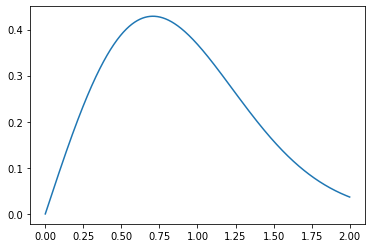

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

# The .plot() is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y.
plt.plot(X, Y)

In [28]:
# Let's make_features() procedure.
def make_features(X):
# The tf.ones_like() method will create a tensor of all ones that has the same shape as the input.
    f1 = tf.ones_like(X)
    f2 = X
# The tf.square() method will compute square of input tensor element-wise.
    f3 = tf.square(X)
# The tf.sqrt() method will compute element-wise square root of the input tensor.
    f4 = tf.sqrt(X)
# The tf.exp() method will compute exponential of input tensor element-wise.
    f5 = tf.exp(X)
# The tf.stack() method will stacks a list of rank-R tensors into one rank-(R+1) tensor.
    return tf.stack([f1, f2, f3, f4, f5], axis=1)

In [29]:
# Let's define predict() procedure that will remove dimensions of size 1 from the shape of a tensor.
def predict(X, W):
    return tf.squeeze(X @ W, -1)

In [30]:
# Let's define loss_mse() procedure that will evaluate the mean of elements across dimensions of a tensor.
def loss_mse(X, Y, W):
    Y_hat = predict(X, W)
    errors = (Y_hat - Y)**2
    return tf.reduce_mean(errors)

In [31]:
# Let's define compute_gradients() procedure for computing the loss gradients.
def compute_gradients(X, Y, W):
    with tf.GradientTape() as tape:
        loss = loss_mse(Xf, Y, W)
    return tape.gradient(loss, W)

STEP: 2000 MSE: 0.002954382449388504


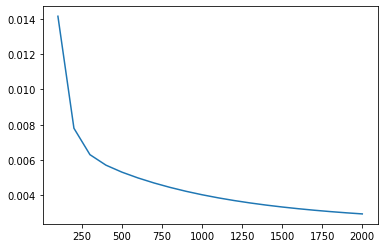

In [38]:
STEPS = 2000
LEARNING_RATE = 0.01


Xf = make_features(X)
n_weights = Xf.shape[1]

W = tf.Variable(np.zeros((n_weights, 1)), dtype=tf.float32)

# For plotting
steps, losses = [], []
plt.figure()


for step in range(1, STEPS + 1):

    dW = compute_gradients(X, Y, W)
    W.assign_sub(dW * LEARNING_RATE)

    if step % 100 == 0:
        loss = loss_mse(Xf, Y, W)
        steps.append(step)
        losses.append(loss)
        plt.clf()
        plt.plot(steps, losses)


print("STEP: {} MSE: {}".format(STEPS, loss_mse(Xf, Y, W)))

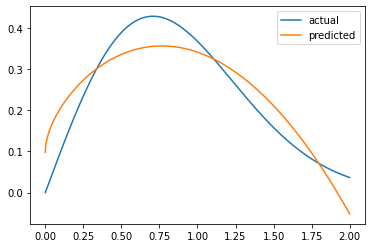

In [39]:
# The .figure() method will create a new figure, or activate an existing figure.
plt.figure()
# The .plot() is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y.
plt.plot(X, Y, label='actual')
plt.plot(X, predict(Xf, W), label='predicted')
# The .legend() method will place a legend on the axes.
plt.legend()